# Parcial 2
# Carlos Fernando Gonzalez Sarmiento
# Cedula: 1003526513
# Portugués y Clasificación


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [ ]:
!pip install -U -q PyDrive

#1.	Realice el proceso de verificación de calidad de datos y limpieza si es necesario realizarla. Mencione al final del punto, un resumen de los hallazgos encontrados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_por = pd.read_csv('/content/drive/MyDrive/student-por.csv', 
                 sep = ';',
                 low_memory=False,
                 error_bad_lines=False,
                 skip_blank_lines=True,
                 )
df_por.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df_por.shape

(649, 33)

In [ ]:
df_por.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
(df_por.isnull()).sum()

school        0
sex           2
age           0
address       0
famsize       2
Pstatus       2
Medu          0
Fedu          0
Mjob          0
Fjob          1
reason        0
guardian      2
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        2
paid          0
activities    0
nursery       1
higher        1
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Analisis de datos faltantes

In [ ]:
(df_por.isnull()==True).sum()

school        0
sex           2
age           0
address       0
famsize       2
Pstatus       2
Medu          0
Fedu          0
Mjob          0
Fjob          1
reason        0
guardian      2
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        2
paid          0
activities    0
nursery       1
higher        1
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df_por[df_por['age'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
df_por[df_por['sex'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
296,GP,NaN,18,U,GT3,T,2,1,other,other,...,5,2,4,1,2,4,2,16,16,16
365,GP,NaN,17,U,GT3,A,4,3,services,services,...,5,2,2,1,2,5,14,15,14,17


In [ ]:
df_por[df_por['famsize'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
191,GP,M,17,U,NaN,T,3,3,other,other,...,4,3,4,1,4,4,4,11,9,10
278,GP,M,17,U,NaN,T,2,3,other,other,...,5,2,2,1,1,2,2,9,12,13


In [ ]:
df_por[df_por['Pstatus'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
430,MS,M,16,U,GT3,NaN,1,2,other,other,...,4,4,3,1,1,5,0,10,11,11
488,MS,F,19,U,GT3,NaN,1,1,at_home,services,...,5,3,1,1,1,3,6,7,9,9


In [ ]:
df_por[df_por['Fjob'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
625,MS,F,18,U,GT3,T,2,3,at_home,NaN,...,5,2,3,1,2,4,0,10,10,10


In [ ]:
df_por[df_por['guardian'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
139,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,4,13,14,15
405,GP,F,19,U,LE3,A,2,3,at_home,other,...,2,2,3,3,4,5,16,10,11,11


In [ ]:
df_por[df_por['famsup'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
99,GP,F,16,U,GT3,T,4,3,other,at_home,...,5,3,5,1,1,3,2,12,13,13
168,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,0,7,8,8


In [ ]:
df_por[df_por['nursery'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
275,GP,F,18,U,GT3,T,2,1,other,other,...,4,4,4,1,1,3,10,12,10,11


In [ ]:
df_por[df_por['higher'].isnull()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
212,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,30,14,15,16


In [ ]:
for col in df_por.columns:
    num_missing = df_por[col].isnull().sum()
    pct_missing = np.mean(df_por[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.31% - 2
age - 0.0% - 0
address - 0.0% - 0
famsize - 0.31% - 2
Pstatus - 0.31% - 2
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.0% - 0
Fjob - 0.15% - 1
reason - 0.0% - 0
guardian - 0.31% - 2
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.31% - 2
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.15% - 1
higher - 0.15% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.0% - 0
absences - 0.0% - 0
G1 - 0.0% - 0
G2 - 0.0% - 0
G3 - 0.0% - 0


## Imputacion de faltantes

In [ ]:
#df1= df_por.copy()
#df1

In [ ]:
#df1=pd.core.frame.DataFrame(df1)
#df1['sex'] = df1['sex'].fillna('Perdido')
#df1['famsize'] = df1['famsize'].fillna('Perdido')
#df1['Pstatus'] = df1['Pstatus'].fillna('Perdido')
#df1['Fjob'] = df1['Fjob'].fillna('Perdido')
#df1['guardian'] = df1['guardian'].fillna('Perdido')
#df1['famsup'] = df1['famsup'].fillna('Perdido')
#df1['nursery'] = df1['nursery'].fillna('Perdido')
#df1['higher'] = df1['higher'].fillna('Perdido')

In [ ]:
#df1.shape

In [ ]:
#df1.isnull().sum()

Ningún valor faltante

## Borrar registros perdidos

In [ ]:
df2=df_por.copy()
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
df2.isnull().sum()

school        0
sex           2
age           0
address       0
famsize       2
Pstatus       2
Medu          0
Fedu          0
Mjob          0
Fjob          1
reason        0
guardian      2
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        2
paid          0
activities    0
nursery       1
higher        1
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
print('Antes de borrar registros: ',df2.shape)
for col in df2.columns:
    missing = df2[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df2['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in df2.columns if 'ismissing' in col]
df2['num_missing'] = df2[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (649, 33)
created missing indicator for: sex
created missing indicator for: famsize
created missing indicator for: Pstatus
created missing indicator for: Fjob
created missing indicator for: guardian
created missing indicator for: famsup
created missing indicator for: nursery
created missing indicator for: higher


In [ ]:
columns=['school' ,     
'sex'           ,
'age'           ,
'address'       ,
'famsize'       ,
'Pstatus'       ,
'Medu'          ,
'Fedu'          ,
'Mjob'          ,
'Fjob'         ,
'reason'        ,
'guardian'      ,
'traveltime'    ,
'studytime'    ,
'failures'      ,
'schoolsup'    ,
'famsup'        ,
'paid'         ,
'activities'    ,
'nursery'       ,
'higher'        ,
'internet'      ,
'romantic'      ,
'famrel'       ,
'freetime'      ,
'goout'         ,
'Dalc'          ,
'Walc'          ,
'health'        ,
'absences'      ,
'G1'            ,
'G2'            ,
'G3'            ]

In [ ]:
ind_missing = df2[df2['num_missing'] >= 1].index
df_less_missing_rows = df2.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows[columns]
print('Después de borrar registros: ',df_less_missing_rows.shape)

Después de borrar registros:  (636, 33)


In [ ]:
df22=df_less_missing_rows

In [ ]:
df22

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Duplicados

In [ ]:
#df1[df1.duplicated()]

In [ ]:
df22[df22.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


No existen datos duplicados en ningúna base

## Consistencia

In [ ]:

#df1.describe()

In [ ]:
df22.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,16.737421,2.514151,2.300314,1.572327,1.927673,0.221698,3.922956,3.188679,3.183962,1.507862,2.289308,3.536164,3.592767,11.418239,11.567610,11.944969
std,1.216131,1.135589,1.100923,0.752605,0.829261,0.596236,0.956721,1.053945,1.178199,0.929788,1.286372,1.449501,4.508177,2.795032,2.922649,3.368000
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,25.000000,19.000000,36.000000


Dentro del diccionario se menciona que G1, G2 y G3 son las notas para cada periodo, estas se mencionan que van entre 0 y 20 entonces seleccionaremos aquellas notas que tengan tales caracteristicas.

In [ ]:
#df11= df1[df1['G1'] <= 20]
#df12=df11[df11['G3'] <= 20]

In [ ]:
#df12.shape

In [ ]:
columns=['school' ,     
'sex'           ,
'age'           ,
'address'       ,
'famsize'       ,
'Pstatus'       ,
'Medu'          ,
'Fedu'          ,
'Mjob'          ,
'Fjob'         ,
'reason'        ,
'guardian'      ,
'traveltime'    ,
'studytime'    ,
'failures'      ,
'schoolsup'    ,
'famsup'        ,
'paid'         ,
'activities'    ,
'nursery'       ,
'higher'        ,
'internet'      ,
'romantic'      ,
'famrel'       ,
'freetime'      ,
'goout'         ,
'Dalc'          ,
'Walc'          ,
'health'        ,
'absences'      ,
'G1'            ,
'G2'            ,
'G3'            ]

In [ ]:
df23= df22[df22['G1'] <= 20]
df24=df23[df23['G3'] <= 20]

In [ ]:
df24.shape

(634, 33)

In [ ]:
df24['sex'].value_counts()

F    375
M    259
Name: sex, dtype: int64

In [ ]:
df24['famsize'].value_counts()

GT3    444
LE3    190
Name: famsize, dtype: int64

In [ ]:
df24['Pstatus'].value_counts()#

T    556
A     77
B      1
Name: Pstatus, dtype: int64

Naturaleza binaria, solo se escoge entre A y T, se elimina B.

In [ ]:
df24['Medu'].value_counts()

2    179
4    170
1    141
3    138
0      6
Name: Medu, dtype: int64

In [ ]:
df24['Fedu'].value_counts()

2    208
1    170
4    125
3    124
0      7
Name: Fedu, dtype: int64

In [ ]:
df24['Mjob'].value_counts()

other       251
services    133
at_home     131
teacher      71
health       48
Name: Mjob, dtype: int64

In [ ]:
df24['Fjob'].value_counts()

other       360
services    176
at_home      40
teacher      35
health       23
Name: Fjob, dtype: int64

In [ ]:
df24['reason'].value_counts()

course        277
home          145
reputation    142
other          70
Name: reason, dtype: int64

In [ ]:
df24['guardian'].value_counts()

mother    445
father    150
other      39
Name: guardian, dtype: int64

In [ ]:
df24['traveltime'].value_counts()

1    357
2    207
3     54
4     16
Name: traveltime, dtype: int64

In [ ]:
df24['studytime'].value_counts()

2    301
1    207
3     91
4     35
Name: studytime, dtype: int64

In [ ]:
df24['failures'].value_counts()

0    537
1     67
2     16
3     14
Name: failures, dtype: int64

In [ ]:
df24['schoolsup'].value_counts()#

no     568
yes     64
Yes      1
No       1
Name: schoolsup, dtype: int64

Se debe unificar las maneras de escribir yes y no




In [ ]:
df24['paid'].value_counts()#

no     594
yes     38
No       2
Name: paid, dtype: int64

Se debe unificar las maneras de escribir  no

In [ ]:
df24['activities'].value_counts()#

no     323
yes    309
Yes      1
No       1
Name: activities, dtype: int64

Se debe unificar las maneras de escribir yes y no

In [ ]:
df24['nursery'].value_counts()#

yes    508
no     125
No       1
Name: nursery, dtype: int64

Se debe unificar las maneras de escribir  no

In [ ]:
df24['higher'].value_counts()

yes    567
no      67
Name: higher, dtype: int64

In [ ]:
df24['internet'].value_counts()#

yes    484
no     149
Yes      1
Name: internet, dtype: int64

Se debe unificar las maneras de escribir yes

In [ ]:
df24['romantic'].value_counts()#

no     400
yes    233
No       1
Name: romantic, dtype: int64

Se debe unificar las maneras de escribir no

In [ ]:
df24['famrel'].value_counts()

4    310
5    173
3    101
2     28
1     22
Name: famrel, dtype: int64

In [ ]:
df24['freetime'].value_counts()

3    247
4    174
2    100
5     68
1     45
Name: freetime, dtype: int64

In [ ]:
df24['goout'].value_counts()

3    201
2    142
4    136
5    108
1     47
Name: goout, dtype: int64

In [ ]:
df24['Dalc'].value_counts()

1    439
2    119
3     42
5     17
4     17
Name: Dalc, dtype: int64

In [ ]:
df24['Walc'].value_counts()

1    240
2    145
3    119
4     85
5     45
Name: Walc, dtype: int64

In [ ]:
df24['health'].value_counts()

5    243
3    121
4    105
1     89
2     76
Name: health, dtype: int64

In [ ]:
df24['absences'].value_counts()

0     240
2     107
4      91
6      48
8      42
10     20
5      12
1      12
12     12
16      9
9       7
3       7
14      7
11      5
18      3
7       3
21      2
15      2
24      1
26      1
22      1
13      1
32      1
Name: absences, dtype: int64

In [ ]:
df25=df24[df24['Pstatus']!='B']

In [ ]:
df25['schoolsup']= df25['schoolsup'].map({'Yes':'yes','No':'no','yes':'yes','no':'no'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df25['schoolsup'].value_counts()#

no     569
yes     64
Name: schoolsup, dtype: int64

In [ ]:
df25['paid']= df25['paid'].map({'Yes':'yes','No':'no','yes':'yes','no':'no'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df25['paid'].value_counts()#

no     595
yes     38
Name: paid, dtype: int64

In [ ]:
df25['activities']= df25['activities'].map({'Yes':'yes','No':'no','yes':'yes','no':'no'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df25['activities'].value_counts()#

no     323
yes    310
Name: activities, dtype: int64

In [ ]:
df25['nursery']= df25['nursery'].map({'Yes':'yes','No':'no','yes':'yes','no':'no'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df25['nursery'].value_counts()#

yes    507
no     126
Name: nursery, dtype: int64

In [ ]:
df25['internet']= df25['internet'].map({'Yes':'yes','No':'no','yes':'yes','no':'no'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df25['internet'].value_counts()#

yes    484
no     149
Name: internet, dtype: int64

In [ ]:
df25['romantic']= df25['romantic'].map({'Yes':'yes','No':'no','yes':'yes','no':'no'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df25['romantic'].value_counts()#

no     400
yes    233
Name: romantic, dtype: int64

In [ ]:
dff=df25.copy()

In [ ]:
dff

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Resumen

Inicialmente se realizó el analisis de datos faltantes en donde se encontró que existían un total de 13 datos faltantes o nulos, siguiendo el orden de 2 datos faltantes para la variables 'sex', 2 valores faltantes para 'famsize', 2 para la variable 'Pstatus', 1 para la variable 'Fjob', 2 para la variable 'guardian', 2 para 'famsup', 1 para 'nursery' y finalmete 1 para 'higher'.

Ya teniendo en cuenta el numero de datos faltantes para cada variable se observó que el porcentaje que estos ocupaban en la base no era ni siquiera del 1% entonces se optó por eliminar sus filas de la base ya que no era una gran cantidad de individuos, se procedió a verificar si existian individuos duplicados en la base, pero no se encontro ninguno.

Finalmente se realizó un analisis de consistencia de la base para verificar como se comportaban las variables y si estaban bien todos los datos, se encontró que en las variables G1 y G3 que son las notas del primer y tercer perido habían valores fuera de su dominio, ya que este se encuentra entre 0 y 20, estas filas se eliminaron, en la variable 'Pstatus', siendo esta binaria se encontró que habia una categoría no nombrada en el diccionario de la base que era 'B', esta fila tambien se eliminó de la base también se encontró en las variables cualitativas, mas especificamente en las variables 'schoolsup','paid','activities','nursery','internet' y 'romantic' que estas siendo binarias se encontraron respuestas de 'yes' y 'no' escritas en mayúscula, se procedió a arreglar lo ya mencionado y la base terminó con 633 individuos.

# 2.	Realice un análisis exploratorio sobre las variables que considere son relevantes para el modelo, teniendo en cuenta el tipo de variable, es decir, si es cuantitativa o cualitativa/categórica. Mencione al final de punto las variables considera que son relevantes para el modelo y escoja 5 según dichos criterios.

In [ ]:
dff.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:

dff['Medu']=dff.Medu.astype('str')
dff['Fedu']=dff.Fedu.astype('str')
dff['traveltime']=dff.traveltime.astype('str')
dff['studytime']=dff.studytime.astype('str')
dff['failures']=dff.failures.astype('str')
dff['famrel']=dff.famrel.astype('str')
dff['Walc']=dff.Walc.astype('str')
dff['Dalc']=dff.Walc.astype('str')
dff['health']=dff.health.astype('str')
dff['freetime']=dff.freetime.astype('str')
dff['goout']=dff.goout.astype('str')

In [ ]:
dff.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 8.7 MB/s 


Mas adelante se encontrará que las variables G1, G2 y G3 mantendran una correlación alta positiva, por ello se creará una nueva variable llamada "cal_total" que se definirá como la calificación promediando las notas de cada periodo.

In [ ]:
from dfply import *
dff1 = (dff >> 
 mutate(
   cal_total = ((X.G1)+(X.G2)+(X.G3))/3
 ))

In [ ]:
dff1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cal_total
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,3,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,2,2,5,0,11,13,13,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,2,2,5,4,10,11,10,10.333333
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,15.333333
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,10.666667
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,4,4,2,6,10,10,10,10.000000


In [ ]:
dff1['school'].value_counts()

GP    411
MS    222
Name: school, dtype: int64

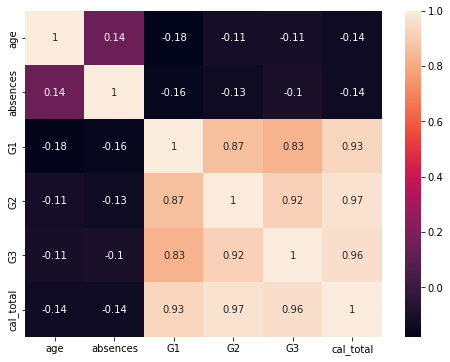

In [ ]:
import seaborn as sns
corr_df = dff1.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## Boxplot

<Figure size 576x432 with 0 Axes>

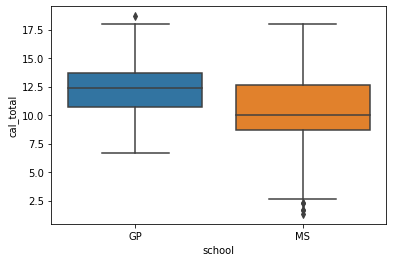

<Figure size 576x432 with 0 Axes>

In [ ]:
sns.boxplot(x="school",y="cal_total",data=dff1)
plt.figure(figsize=(8, 6))

Parecen existir mejores notas en el colegio "GP"

<Figure size 576x432 with 0 Axes>

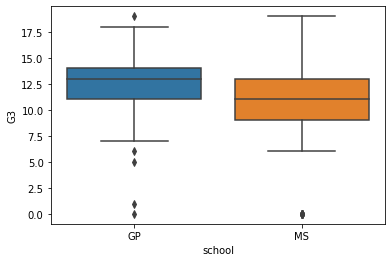

<Figure size 576x432 with 0 Axes>

In [ ]:
sns.boxplot(x="school",y="G3",data=dff1)
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

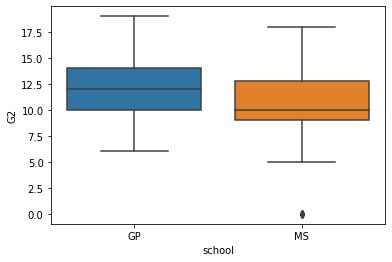

<Figure size 576x432 with 0 Axes>

In [ ]:
sns.boxplot(x="school",y="G2",data=dff1)
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

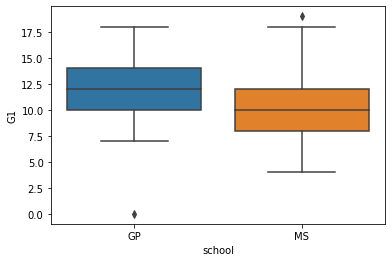

<Figure size 576x432 with 0 Axes>

In [ ]:
sns.boxplot(x="school",y="G1",data=dff1)
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

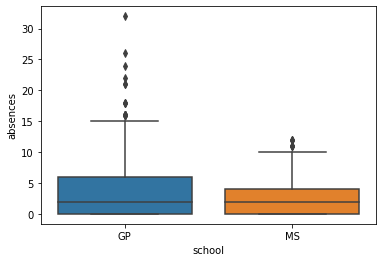

<Figure size 576x432 with 0 Axes>

In [ ]:
sns.boxplot(x="school",y="absences",data=dff1)
plt.figure(figsize=(8, 6))

Parecen existir mayores ausencias en el colegio GP

<Figure size 576x432 with 0 Axes>

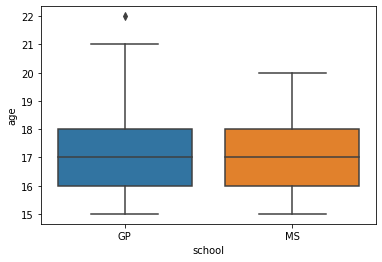

<Figure size 576x432 with 0 Axes>

In [ ]:
sns.boxplot(x="school",y="age",data=dff1)
plt.figure(figsize=(8, 6))

Casi parece no haber diferencias entre las edades de los colegios respecto a su media

## Gráficos de barras

In [ ]:
dff1['col']= dff1['school'].map({'GP':1,'MS':0})

In [183]:
a=dff1[dff1['school']=='GP']
b=a[a['sex']=='F']
a2=dff1[dff1['school']=='GP']
b2=a2[a2['sex']=='M']
a3=dff1[dff1['school']=='MS']
b3=a3[a3['sex']=='F']
a4=dff1[dff1['school']=='MS']
b4=a4[a4['sex']=='M']

Text(0, 0.5, 'Frecuencia')

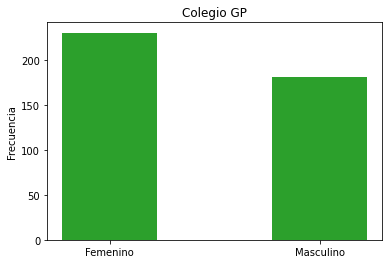

In [ ]:
s = ["Femenino","Masculino"]
m = [len(b),len(b2)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Colegio GP")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

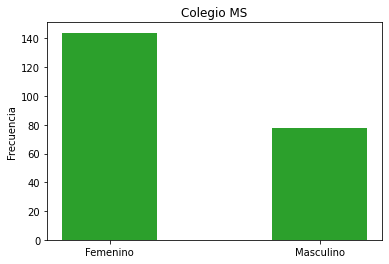

In [ ]:
s = ["Femenino","Masculino"]
m = [len(b3),len(b4)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Colegio MS")
plt.ylabel("Frecuencia")

En ambos colegios existe mayor cantidad de mujeres que de hombres

Text(0, 0.5, 'Frecuencia')

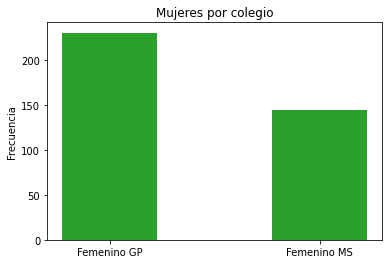

In [184]:
s = ["Femenino GP","Femenino MS"]
m = [len(b),len(b3)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Mujeres por colegio")
plt.ylabel("Frecuencia")

Mayor número de mujeres en GP

Text(0, 0.5, 'Frecuencia')

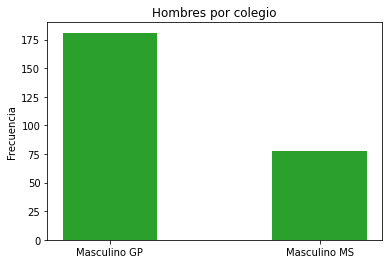

In [186]:
s = ["Masculino GP","Masculino MS"]
m = [len(b2),len(b4)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Hombres por colegio")
plt.ylabel("Frecuencia")

Mas hombres en GP

Text(0, 0.5, 'Frecuencia')

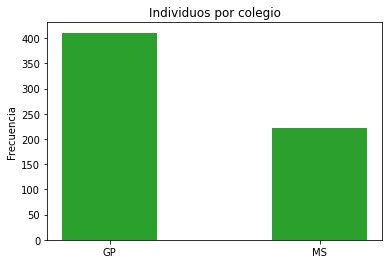

In [187]:
s = ["GP","MS"]
m = [len(b)+len(b2),len(b3)+len(b4)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Individuos por colegio")
plt.ylabel("Frecuencia")

Mayor número de individuos en el colegio GP

In [188]:
a=dff1[dff1['school']=='GP']
b=a[a['reason']=='home']
a2=dff1[dff1['school']=='GP']
b2=a2[a2['reason']=='reputation']
a3=dff1[dff1['school']=='GP']
b3=a3[a3['reason']=='course']
a4=dff1[dff1['school']=='GP']
b4=a4[a4['reason']=='other']
a5=dff1[dff1['school']=='MS']
b5=a5[a5['reason']=='home']
a6=dff1[dff1['school']=='MS']
b6=a6[a6['reason']=='reputation']
a7=dff1[dff1['school']=='MS']
b7=a7[a7['reason']=='course']
a8=dff1[dff1['school']=='MS']
b8=a8[a8['reason']=='other']

Text(0, 0.5, 'Frecuencia')

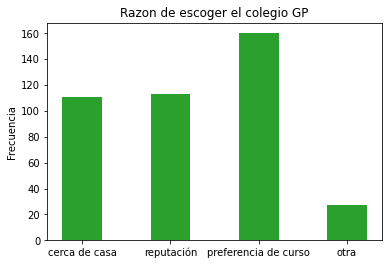

In [189]:
s = ['cerca de casa','reputación','preferencia de curso','otra']
m = [len(b),len(b2),len(b3),len(b4)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Razon de escoger el colegio GP")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

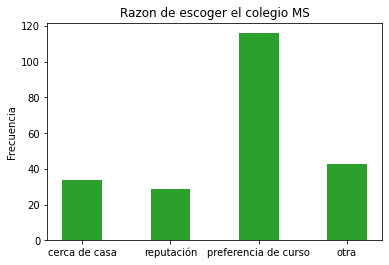

In [190]:
s = ['cerca de casa','reputación','preferencia de curso','otra']
m = [len(b5),len(b6),len(b7),len(b8)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Razon de escoger el colegio MS")
plt.ylabel("Frecuencia")

In [112]:
gp=dff1['col'].value_counts()[1]
ms=dff1['col'].value_counts()[0]

In [191]:
a=dff1[dff1['school']=='GP']
a2=dff1[dff1['school']=='MS']


Text(0, 0.5, 'Frecuencia')

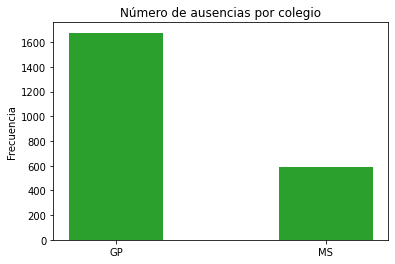

In [193]:
s = ['GP','MS']
m = [a['absences'].sum(),a2['absences'].sum()]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Número de ausencias por colegio")
plt.ylabel("Frecuencia")

In [194]:
a=dff1[dff1['school']=='GP']
b=a[a['traveltime']=='1']
a2=dff1[dff1['school']=='GP']
b2=a2[a2['traveltime']=='2']
a3=dff1[dff1['school']=='GP']
b3=a3[a3['traveltime']=='3']
a4=dff1[dff1['school']=='GP']
b4=a4[a4['traveltime']=='4']
a5=dff1[dff1['school']=='MS']
b5=a5[a5['traveltime']=='1']
a6=dff1[dff1['school']=='MS']
b6=a6[a6['traveltime']=='2']
a7=dff1[dff1['school']=='MS']
b7=a7[a7['traveltime']=='3']
a8=dff1[dff1['school']=='MS']
b8=a8[a8['traveltime']=='4']

Text(0, 0.5, 'Frecuencia')

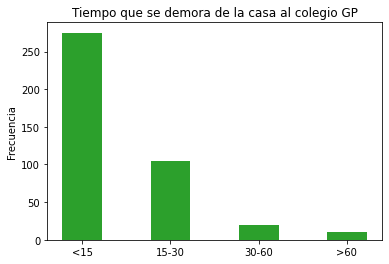

In [196]:
s = ['<15','15-30','30-60','>60']
m = [len(b),len(b2),len(b3),len(b4)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Tiempo que se demora de la casa al colegio GP")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

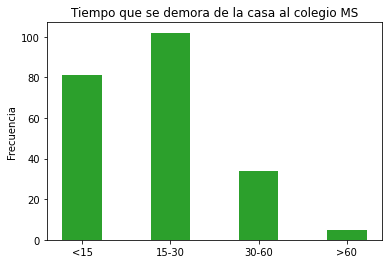

In [197]:
s = ['<15','15-30','30-60','>60']
m = [len(b5),len(b6),len(b7),len(b8)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Tiempo que se demora de la casa al colegio MS")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

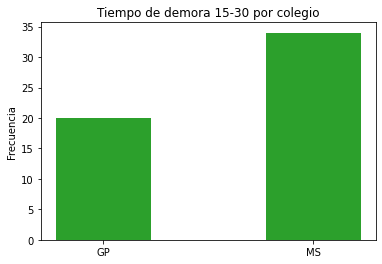

In [198]:
s = ['GP','MS']
m = [len(b3),len(b7),]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Tiempo de demora 15-30 por colegio")
plt.ylabel("Frecuencia")

Mayor tiempo en MS, algo interesante

In [199]:
a=dff1[dff1['school']=='GP']
b=a[a['freetime']=='1']
a2=dff1[dff1['school']=='GP']
b2=a2[a2['freetime']=='2']
a3=dff1[dff1['school']=='GP']
b3=a3[a3['freetime']=='3']
a4=dff1[dff1['school']=='GP']
b4=a4[a4['freetime']=='4']
a45=dff1[dff1['school']=='GP']
b45=a45[a45['freetime']=='5']

a5=dff1[dff1['school']=='MS']
b5=a5[a5['freetime']=='1']
a6=dff1[dff1['school']=='MS']
b6=a6[a6['freetime']=='2']
a7=dff1[dff1['school']=='MS']
b7=a7[a7['freetime']=='3']
a8=dff1[dff1['school']=='MS']
b8=a8[a8['freetime']=='4']
a9=dff1[dff1['school']=='MS']
b9=a9[a9['freetime']=='5']

Text(0, 0.5, 'Frecuencia')

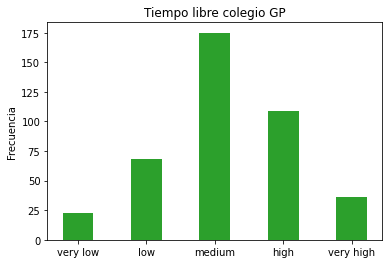

In [200]:
s = ['very low','low','medium','high','very high']
m = [len(b),len(b2),len(b3),len(b4),len(b45)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Tiempo libre colegio GP")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

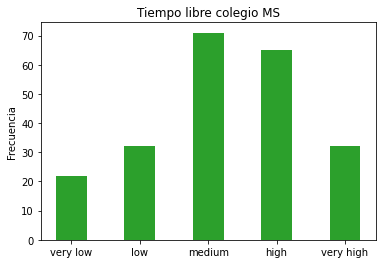

In [201]:
s = ['very low','low','medium','high','very high']
m = [len(b5),len(b6),len(b7),len(b8),len(b9)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Tiempo libre colegio MS")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

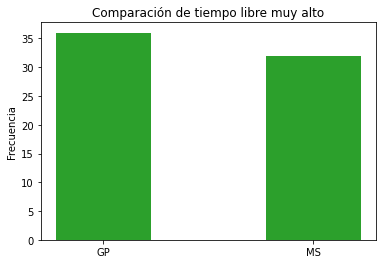

In [202]:
s = ['GP','MS']
m = [len(b45),len(b9)]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Comparación de tiempo libre muy alto")
plt.ylabel("Frecuencia")

Mas alto en el colegio GP, me interesan las variables que posean valores mas altos en MS al ser menos personas

## Gráficos de calor

In [120]:
tab1 = pd.crosstab(dff1["school"],dff1["reason"])
tab1

reason,course,home,other,reputation
school,,,,
GP,160,111,27,113
MS,116,34,43,29


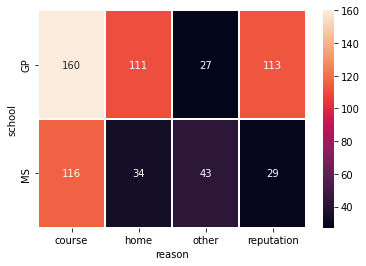

In [121]:
ax = sns.heatmap(tab1,annot=True, fmt="d",linewidths=.5)

Razon de entrar al colegio, mayor en "otra" para colegio MS

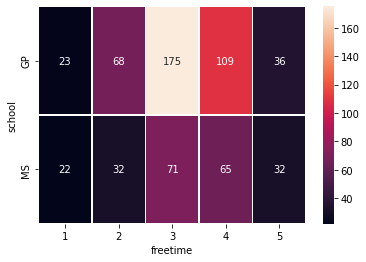

In [122]:
tab2 = pd.crosstab(dff1["school"],dff1["freetime"])
ax = sns.heatmap(tab2,annot=True, fmt="d",linewidths=.5)

In [123]:
tab2

freetime,1,2,3,4,5
school,,,,,
GP,23,68,175,109,36
MS,22,32,71,65,32


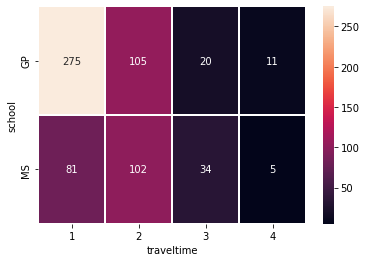

In [203]:
tab3 = pd.crosstab(dff1["school"],dff1["traveltime"])
ax = sns.heatmap(tab3,annot=True, fmt="d",linewidths=.5)

Tiempo de viaje entre 30 minutos y una hora mayor en el colegio MS

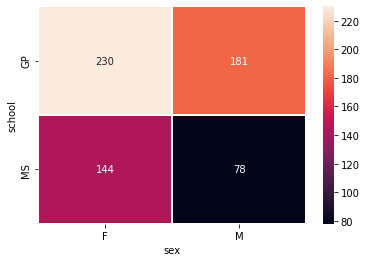

In [125]:
tab4 = pd.crosstab(dff1["school"],dff1["sex"])
ax = sns.heatmap(tab4,annot=True, fmt="d",linewidths=.5)

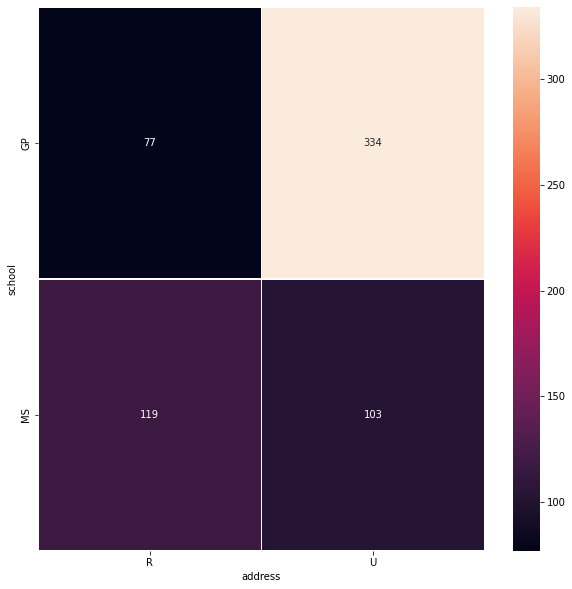

In [126]:
plt.subplots(figsize=(10, 10))
tab5 = pd.crosstab(dff1["school"],dff1["address"])
ax = sns.heatmap(tab5,annot=True, fmt="d",linewidths=.5)


Mayor cantidad de estudiantes rurales en el colegio MS

In [127]:
tab5

address,R,U
school,,
GP,77,334
MS,119,103


Las variables a escoger será la variable creada promediando las notas "cal_total", el sexo "sex", la dirección "address", el tiempo de viaje de la casa al colegio "traveltime" y la razon de escoger el colegio "reason", la variable respuesta será de que colegio es, o clasificar el colegio

# 3.	Seleccione un algoritmo de regresión clasificación según le corresponda (lineal, logístico o lasso o ridge) teniendo en cuenta lo siguiente:

In [128]:
Sex = pd.get_dummies(dff1['sex'],prefix = 'sex')
Address= pd.get_dummies(dff1['address'],prefix = 'address')
travel_t = pd.get_dummies(dff1['traveltime'],prefix = 'traveltime')
reason = pd.get_dummies(dff1['reason'],prefix = 'reason')


In [129]:
dc=dff1.copy()

In [130]:
dc2=dc[['col','cal_total']]

In [131]:
dc2

,col,cal_total
0,1,7.333333
1,1,10.333333
2,1,12.333333
3,1,14.000000
4,1,12.333333
...,...,...
644,0,10.333333
645,0,15.333333
646,0,10.666667
647,0,10.000000


In [132]:
dc3=pd.concat([dc2,Sex,Address,travel_t,reason],axis=1)

In [133]:
dc3

,col,cal_total,sex_F,sex_M,address_R,address_U,traveltime_1,traveltime_2,traveltime_3,traveltime_4,reason_course,reason_home,reason_other,reason_reputation
0,1,7.333333,1,0,0,1,0,1,0,0,1,0,0,0
1,1,10.333333,1,0,0,1,1,0,0,0,1,0,0,0
2,1,12.333333,1,0,0,1,1,0,0,0,0,0,1,0
3,1,14.000000,1,0,0,1,1,0,0,0,0,1,0,0
4,1,12.333333,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,10.333333,1,0,1,0,1,0,0,0,1,0,0,0
645,0,15.333333,1,0,0,1,1,0,0,0,1,0,0,0
646,0,10.666667,1,0,0,1,0,1,0,0,1,0,0,0
647,0,10.000000,0,1,0,1,0,1,0,0,1,0,0,0


In [134]:
(dc3.isnull()).sum()

col                  0
cal_total            0
sex_F                0
sex_M                0
address_R            0
address_U            0
traveltime_1         0
traveltime_2         0
traveltime_3         0
traveltime_4         0
reason_course        0
reason_home          0
reason_other         0
reason_reputation    0
dtype: int64

In [135]:
dc4=dc3.drop(['sex_F','address_U','traveltime_1','reason_course'],axis=1)
dc4

,col,cal_total,sex_M,address_R,traveltime_2,traveltime_3,traveltime_4,reason_home,reason_other,reason_reputation
0,1,7.333333,0,0,1,0,0,0,0,0
1,1,10.333333,0,0,0,0,0,0,0,0
2,1,12.333333,0,0,0,0,0,0,1,0
3,1,14.000000,0,0,0,0,0,1,0,0
4,1,12.333333,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
644,0,10.333333,0,1,0,0,0,0,0,0
645,0,15.333333,0,0,0,0,0,0,0,0
646,0,10.666667,0,0,1,0,0,0,0,0
647,0,10.000000,1,0,1,0,0,0,0,0


In [136]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['cal_total','sex_M','address_R','traveltime_2','traveltime_3','traveltime_4','reason_home','reason_other','reason_reputation']
X = dc4[feature_cols]
y = dc4.col
logreg.fit(X, y)
dc4['col_pred'] = logreg.predict(X)
dc4.head()

,col,cal_total,sex_M,address_R,traveltime_2,traveltime_3,traveltime_4,reason_home,reason_other,reason_reputation,col_pred
0,1,7.333333,0,0,1,0,0,0,0,0,0
1,1,10.333333,0,0,0,0,0,0,0,0,1
2,1,12.333333,0,0,0,0,0,0,1,0,1
3,1,14.000000,0,0,0,0,0,1,0,0,1
4,1,12.333333,0,0,0,0,0,1,0,0,1


In [137]:
dc4['col'].value_counts()

1    411
0    222
Name: col, dtype: int64

In [138]:
dc4['col_pred'].value_counts()

1    461
0    172
Name: col_pred, dtype: int64

In [139]:
from sklearn.linear_model import LogisticRegression
feature_cols = ['cal_total','sex_M','address_R','traveltime_2','traveltime_3','traveltime_4','reason_home','reason_other','reason_reputation']
X = dc4[feature_cols]
y = dc4.col
############################################## Modelo 1
logreg1 = LogisticRegression(solver='liblinear',C=1e9,tol=0.1)
logreg1.fit(X, y)
dc4['col_pred'] = logreg1.predict(X)
############################################## Modelo 2
logreg2 = LogisticRegression(solver='liblinear',C=1e9,tol=0.01)
logreg2.fit(X, y)
dc4['col_pred1'] = logreg2.predict(X)
############################################## Modelo 3
logreg3 = LogisticRegression(solver='liblinear',C=1e9,tol=0.001)
logreg3.fit(X, y)
dc4['col_pred2'] = logreg3.predict(X)
############################################## Modelo 4
logreg4 = LogisticRegression(solver='liblinear',C=1,tol=0.1)
logreg4.fit(X, y)
dc4['col_pred3'] = logreg4.predict(X)
############################################## Modelo 5
logreg5 = LogisticRegression(solver='liblinear',C=1,tol=0.01)
logreg5.fit(X, y)
dc4['col_pred4'] = logreg5.predict(X)
############################################## Modelo 6
logreg6 = LogisticRegression(solver='liblinear',C=1,tol=0.001)
logreg6.fit(X, y)
dc4['col_pred5'] = logreg6.predict(X)
############################################## Modelo 7
logreg7 = LogisticRegression(solver='liblinear',C=0.1,tol=0.1)
logreg7.fit(X, y)
dc4['col_pred6'] = logreg7.predict(X)
############################################## Modelo 8
logreg8 = LogisticRegression(solver='liblinear',C=0.1,tol=0.01)
logreg8.fit(X, y)
dc4['col_pred7'] = logreg8.predict(X)
############################################## Modelo 9
logreg9 = LogisticRegression(solver='liblinear',C=0.1,tol=0.001)
logreg9.fit(X, y)
dc4['col_pred8'] = logreg9.predict(X)

In [140]:
dc4['col'].value_counts()

1    411
0    222
Name: col, dtype: int64

In [141]:
dc4['col_pred'].value_counts()

1    511
0    122
Name: col_pred, dtype: int64

In [142]:
from sklearn import metrics
metrics.precision_score(dc4['col'],dc4['col_pred'])

0.7436399217221135

In [172]:
metrics.accuracy_score(dc4['col'],dc4['col_pred'])

0.7440758293838863

In [143]:
dc4['col_pred1'].value_counts()

1    469
0    164
Name: col_pred1, dtype: int64

In [144]:
dc4['col_pred2'].value_counts()

1    461
0    172
Name: col_pred2, dtype: int64

In [145]:
dc4['col_pred3'].value_counts()

1    511
0    122
Name: col_pred3, dtype: int64

In [146]:
dc4['col_pred4'].value_counts()

1    467
0    166
Name: col_pred4, dtype: int64

In [147]:
dc4['col_pred5'].value_counts()

1    465
0    168
Name: col_pred5, dtype: int64

In [148]:
dc4['col_pred6'].value_counts()

1    504
0    129
Name: col_pred6, dtype: int64

In [149]:
dc4['col_pred7'].value_counts()

1    489
0    144
Name: col_pred7, dtype: int64

In [150]:
dc4['col_pred8'].value_counts()

1    489
0    144
Name: col_pred8, dtype: int64

# 3.2	Estime el modelo utilizando únicamente una partición de entrenamiento (80%) and test (20%). Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 9) (127, 9) (506,) (127,)


In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge

In [153]:
############################################## Modelo 1
logreg1 = LogisticRegression(penalty='l2',solver='liblinear',C=1e9,tol=0.1)
logreg1.fit(X_train_scaled, y_train)
ypred1 = logreg1.predict(X_train_scaled)
############################################## Modelo 2
logreg2 = LogisticRegression(penalty='l2',solver='liblinear',C=1e9,tol=0.01)
logreg2.fit(X_train_scaled, y_train)
ypred2 = logreg2.predict(X_train_scaled)
############################################## Modelo 3
logreg3 = LogisticRegression(penalty='l2',solver='liblinear',C=1e9,tol=0.001)
logreg3.fit(X_train_scaled, y_train)
ypred3= logreg3.predict(X_train_scaled)
############################################## Modelo 4
logreg4 = LogisticRegression(penalty='l2',solver='liblinear',C=1,tol=0.1)
logreg4.fit(X_train_scaled, y_train)
ypred4 = logreg4.predict(X_train_scaled)
############################################## Modelo 5
logreg5 = LogisticRegression(penalty='l2',solver='liblinear',C=1,tol=0.01)
logreg5.fit(X_train_scaled, y_train)
ypred5 = logreg5.predict(X_train_scaled)
############################################## Modelo 6
logreg6 = LogisticRegression(penalty='l2',solver='liblinear',C=1,tol=0.001)
logreg6.fit(X_train_scaled, y_train)
ypred6= logreg6.predict(X_train_scaled)
############################################## Modelo 7
logreg7 = LogisticRegression(penalty='l2',solver='liblinear',C=0.1,tol=0.1)
logreg7.fit(X_train_scaled, y_train)
ypred7 = logreg7.predict(X_train_scaled)
############################################## Modelo 8
logreg8 = LogisticRegression(penalty='l2',solver='liblinear',C=0.1,tol=0.01)
logreg8.fit(X_train_scaled, y_train)
ypred8 = logreg8.predict(X_train_scaled)
############################################## Modelo 9
logreg9 = LogisticRegression(penalty='l2',solver='liblinear',C=0.1,tol=0.001)
logreg9.fit(X_train_scaled, y_train)
ypred9= logreg9.predict(X_train_scaled)

## Lasso

In [154]:
############################################## Modelo 10
logreg10 = LogisticRegression(penalty='l1',solver='liblinear',C=1e9,tol=0.1)
logreg10.fit(X_train_scaled, y_train)
ypred10 = logreg10.predict(X_train_scaled)
############################################## Modelo 11
logreg11 = LogisticRegression(penalty='l1',solver='liblinear',C=1e9,tol=0.01)
logreg11.fit(X_train_scaled, y_train)
ypred11 = logreg11.predict(X_train_scaled)
############################################## Modelo 12
logreg12 = LogisticRegression(penalty='l1',solver='liblinear',C=1e9,tol=0.001)
logreg12.fit(X_train_scaled, y_train)
ypred12= logreg12.predict(X_train_scaled)
############################################## Modelo 13
logreg13 = LogisticRegression(penalty='l1',solver='liblinear',C=1,tol=0.1)
logreg13.fit(X_train_scaled, y_train)
ypred13 = logreg13.predict(X_train_scaled)
############################################## Modelo 14
logreg14 = LogisticRegression(penalty='l1',solver='liblinear',C=1,tol=0.01)
logreg14.fit(X_train_scaled, y_train)
ypred14 = logreg14.predict(X_train_scaled)
############################################## Modelo 15
logreg15 = LogisticRegression(penalty='l1',solver='liblinear',C=1,tol=0.001)
logreg15.fit(X_train_scaled, y_train)
ypred15= logreg15.predict(X_train_scaled)
############################################## Modelo 16
logreg16 = LogisticRegression(penalty='l1',solver='liblinear',C=0.1,tol=0.1)
logreg16.fit(X_train_scaled, y_train)
ypred16 = logreg16.predict(X_train_scaled)
############################################## Modelo 17
logreg17 = LogisticRegression(penalty='l1',solver='liblinear',C=0.1,tol=0.01)
logreg17.fit(X_train_scaled, y_train)
ypred17 = logreg17.predict(X_train_scaled)
############################################## Modelo 18
logreg18 = LogisticRegression(penalty='l1',solver='liblinear',C=0.1,tol=0.001)
logreg18.fit(X_train_scaled, y_train)
ypred18= logreg18.predict(X_train_scaled)

In [155]:
np.array(np.unique(ypred9,return_counts=True))


array([[  0,   1],
       [134, 372]])

In [156]:
np.array(np.unique(ypred18,return_counts=True))

array([[  0,   1],
       [131, 375]])

# 3.3 Estime el modelo, utilizando la partición anterior, pero en la partición de entrenamiento utilizar un K Fold Cross Validation (k=5 y k=10).

In [157]:
clf1_tt = LogisticRegression(solver='liblinear')
clf1_tt.fit(X_train,y_train)
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=666, shuffle=True)

In [158]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf1_tt, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
scores12 = cross_val_score(clf1_tt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [159]:
np.mean(scores1)

0.7908916984241425

In [160]:
np.mean(scores12)

0.7687827606290041

In [161]:
clf2_tt = LogisticRegression(solver='liblinear')
clf2_tt.fit(X_train,y_train)
cv = KFold(n_splits=10, random_state=666, shuffle=True)
scores2 = cross_val_score(clf2_tt, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
scores3=cross_val_score(clf2_tt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [162]:
np.mean(scores2)

0.7909445780413523

In [163]:
np.mean(scores3)

0.7686274509803922

# 3.4 Para cada uno de los anteriores puntos, seleccionar dos métricas y evaluar los modelos teniendo en cuenta que el resultado a presentar y analizar será en la partición de test.

In [171]:
from sklearn import metrics
c_est = [1e9,1,0.1]
t_est = [0.1,0.01,0.001]



print('Modelo: RIDGE')
for i in c_est:
  for j in t_est:
    l_reg = LogisticRegression(C=i, tol=j,multi_class='auto',solver='liblinear',penalty='l2')
    l_reg.fit(X_train_scaled, y_train)
    y_pred = l_reg.predict(X_test_scaled)
    print(f'C = {i}, tolerancia = {j}',)
    print(f'Precisión: {metrics.precision_score(y_test, y_pred).round(4)}')
    print(f'Exactitud: {metrics.accuracy_score(y_test, y_pred).round(4)}')
    print('-----------------------------'*10)

Modelo: RIDGE
C = 1000000000.0, tolerancia = 0.1
Precisión: 0.7245
Exactitud: 0.7402
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C = 1000000000.0, tolerancia = 0.01
Precisión: 0.7216
Exactitud: 0.7323
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C = 1000000000.0, tolerancia = 0.001
Precisión: 0.7216
Exactitud: 0.7323
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [170]:

c_est = [1e9,1,0.1]
t_est = [0.1,0.01,0.001]



print('Modelo: LASSO')
for i in c_est:
  for j in t_est:
    l_reg = LogisticRegression(C=i, tol=j,multi_class='auto',solver='liblinear',penalty='l1')
    l_reg.fit(X_train_scaled, y_train)
    y_pred = l_reg.predict(X_test_scaled)
    print(f'C = {i}, tolerancia = {j}',)
    print(f'Precisión: {metrics.precision_score(y_test, y_pred).round(4)}')
    print(f'Exactitud: {metrics.accuracy_score(y_test, y_pred).round(4)}')
    print('-----------------------------'*10)

Modelo: LASSO
C = 1000000000.0, tolerancia = 0.1
Precisión: 0.7216
Exactitud: 0.7323
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C = 1000000000.0, tolerancia = 0.01
Precisión: 0.7216
Exactitud: 0.7323
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C = 1000000000.0, tolerancia = 0.001
Precisión: 0.7216
Exactitud: 0.7323
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [167]:
#K fold k=5
ypred1=clf1_tt.predict(X_test)
print(metrics.precision_score(y_test,ypred1))
print(metrics.accuracy_score(y_test,ypred1))

0.7216494845360825
0.7322834645669292


In [168]:
#K fold k=10
ypred2=clf2_tt.predict(X_test)
print(metrics.precision_score(y_test,ypred2))
print(metrics.accuracy_score(y_test,ypred2))

0.7216494845360825
0.7322834645669292


# 4.1 ¿Cuál fue el mejor modelo según las métricas anteriormente mencionadas?

Según todos los modelos hechos anteriormente y revisandolos uno a uno, que sue puedan hacer comparaciones con su **partición de testeo**, los mejores modelos basandonos en sus metricas de precisión excatitus fueron los siguientes:

C=1 y tolerancia=0.1, modelo ridge

In [174]:
l_reg = LogisticRegression(C=1, tol=0.1,multi_class='auto',solver='liblinear',penalty='l2')
l_reg.fit(X_train_scaled, y_train)
y_pred = l_reg.predict(X_test_scaled)

print(f'Precisión: {metrics.precision_score(y_test, y_pred).round(4)}')
print(f'Exactitud: {metrics.accuracy_score(y_test, y_pred).round(4)}')

Precisión: 0.7245
Exactitud: 0.7402


C=1000000000 y tolerancia=0.1, modelo ridge

In [175]:
l_reg = LogisticRegression(C=1e9, tol=0.1,multi_class='auto',solver='liblinear',penalty='l2')
l_reg.fit(X_train_scaled, y_train)
y_pred = l_reg.predict(X_test_scaled)

print(f'Precisión: {metrics.precision_score(y_test, y_pred).round(4)}')
print(f'Exactitud: {metrics.accuracy_score(y_test, y_pred).round(4)}')

Precisión: 0.7245
Exactitud: 0.7402


Para intentar desempatar camculemos el recall

In [176]:
l_reg = LogisticRegression(C=1, tol=0.1,multi_class='auto',solver='liblinear',penalty='l2')
l_reg.fit(X_train_scaled, y_train)
y_pred = l_reg.predict(X_test_scaled)

print(f'Recall: {metrics.recall_score(y_test, y_pred).round(4)}')


Recall: 0.9221


In [177]:
l_reg = LogisticRegression(C=1e9, tol=0.1,multi_class='auto',solver='liblinear',penalty='l2')
l_reg.fit(X_train_scaled, y_train)
y_pred = l_reg.predict(X_test_scaled)

print(f'Recall: {metrics.recall_score(y_test, y_pred).round(4)}')


Recall: 0.9221


Ni con esta metrica se pudo decidir si uno era mejor que otro entonces optaré por el que tiene menor C ya que está mas regularizado

# 4.2 	De la respuesta anterior ¿Qué valores de los parámetros se seleccionaron para lograr dicho resultado?

Como ya se mencionó anteriormente se seleccionaron los parametros de C=1, la tolerancia de 0.1 y un modelo ridge de penalizado

In [178]:
l_reg = LogisticRegression(C=1, tol=0.1,multi_class='auto',solver='liblinear',penalty='l2')
l_reg.fit(X_train_scaled, y_train)
y_pred = l_reg.predict(X_test_scaled)

# 4.3 	Analice los coeficientes del modelo final seleccionado

In [179]:
coeficientes= pd.DataFrame( {'variable': X_train.columns,'coeficientes': l_reg.coef_.flatten()})
coeficientes

,variable,coeficientes
0,cal_total,0.475627
1,sex_M,0.290595
2,address_R,-0.608327
3,traveltime_2,-0.355204
4,traveltime_3,-0.254892
5,traveltime_4,0.112951
6,reason_home,0.154124
7,reason_other,-0.241458
8,reason_reputation,0.411862


In [181]:
l_reg.intercept_

array([0.82190358])

$y_{school}$= 0.82190358+ 0.475627 $X_{caltotal}$+0.290595 $X_{sexM}$ - 0.608327 $X_{addressR}$  -0.355204 $X_{traveltime2}$ -0.254892 $X_{traveltime3}$ + 0.112951 $X_{traveltime4}$ +0.154124 $X_{reasonhome}$ -0.241458 $X_{reasonother}$ +0.411862 $X_{reasonreputation}$

Se estima que un aumento de 1 unidad en la calificación total se asocia con un aumento de 0.4756 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira.

Se estima que ser de sexo masculino se asocia en un aumento de 0.2926 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira en comparación a ser de sexo femenino.

Se estima que ser de dirección rural se asocia en una disminución de 0.6083 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira en comparación a ser de dirección urbana.

Se estima que demorarse entre 15 y 30 minutos de la casa al colegio se asocia en una disminución de 0.3552 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira en comparación a demorarse menos de 15 minutos, se estima que demorarse entre 30 y 60 minutos de la casa al colegio se asocia en una disminución de 0.2549 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira en comparación a demorarse menos de 15 minutos, se estima que demorarse mas de una hora de la casa al colegio se asocia en un aumento de 0.1129 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira en comparación a demorarse menos de 15 minutos.

se estima que la razon de haber escogido el colegio sea que esta cerca de casa se asocia en un aumento de 0.1541 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira en comparación a haber escogido el colegio por preferencia de curso, se estima que la razon de haber escogido el colegio sea "otra" se asocia en una dismunición de 0.2415 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira en comparación a haber escogido el colegio por preferencia de curso, se estima que la razon de haber escogido el colegio sea por la reputación de este, se asocia en un aumento de 0.4119 unidades en las probabilidades logarítmicas de pertenecer al colegio Gabriel Pereira en comparación a haber escogido el colegio por preferencia de curso. 

Gracias!